In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
traffic_data = pd.read_csv('traffic.csv')

In [3]:
traffic_data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
traffic_data['Time'] = pd.to_datetime(traffic_data['Time'])
print(traffic_data['Time'].dtype)

datetime64[ns]


C:\Users\vip\AppData\Local\Temp\ipykernel_9648\854988579.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_data['Time'] = pd.to_datetime(traffic_data['Time'])


In [6]:
traffic_data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2025-11-12 00:00:00,10,Tuesday,31,0,4,4,39,low
1,2025-11-12 00:15:00,10,Tuesday,49,0,3,3,55,low
2,2025-11-12 00:30:00,10,Tuesday,46,0,3,6,55,low
3,2025-11-12 00:45:00,10,Tuesday,51,0,2,5,58,low
4,2025-11-12 01:00:00,10,Tuesday,57,6,15,16,94,normal


In [7]:
traffic_data['hour'] = traffic_data['Time'].dt.hour.astype(np.int8)
traffic_data['minute'] = traffic_data['Time'].dt.minute.astype(np.int8)
traffic_data['second'] = traffic_data['Time'].dt.second.astype(np.int8)


# Optional: drop original time columns before feeding into ML model
traffic_data = traffic_data.drop(columns=['Time'])

In [8]:
traffic_data.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,second
0,10,Tuesday,31,0,4,4,39,low,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder_days = LabelEncoder()
label_encoder_days.fit(traffic_data['Day of the week'])
traffic_data['Day of the week'] = label_encoder_days.transform(traffic_data['Day of the week'])

In [12]:
# save the label encoder for future use
import pickle
with open('day_label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder_days, f)
    

In [10]:
label_encoder_days.classes_

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [11]:
label_encoder_labels = LabelEncoder()
label_encoder_labels.fit(traffic_data['Traffic Situation'])
traffic_data['Traffic Situation'] = label_encoder_labels.transform(traffic_data['Traffic Situation'])

In [13]:
with open('label_encoder_labels.pkl', 'wb') as f:
    pickle.dump(label_encoder_labels, f)

In [12]:
traffic_data.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,second
0,10,5,31,0,4,4,39,2,0,0,0
1,10,5,49,0,3,3,55,2,0,15,0
2,10,5,46,0,3,6,55,2,0,30,0
3,10,5,51,0,2,5,58,2,0,45,0
4,10,5,57,6,15,16,94,3,1,0,0


In [13]:
traffic_data.describe()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,second
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000,2976.000000,2976.0
mean,16.000000,3.193548,68.696573,14.917339,15.279570,15.324933,114.218414,1.994624,11.50000,22.500000,0.0
std,8.945775,2.007090,45.850693,12.847518,14.341986,10.603833,60.190627,1.259307,6.92335,16.773328,0.0
min,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.00000,0.000000,0.0
25%,8.000000,1.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,5.75000,11.250000,0.0
50%,16.000000,3.000000,64.000000,12.000000,12.000000,14.000000,109.000000,3.000000,11.50000,22.500000,0.0
75%,24.000000,5.000000,107.000000,22.000000,25.000000,23.000000,164.000000,3.000000,17.25000,33.750000,0.0
max,31.000000,6.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,23.00000,45.000000,0.0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Matrix')

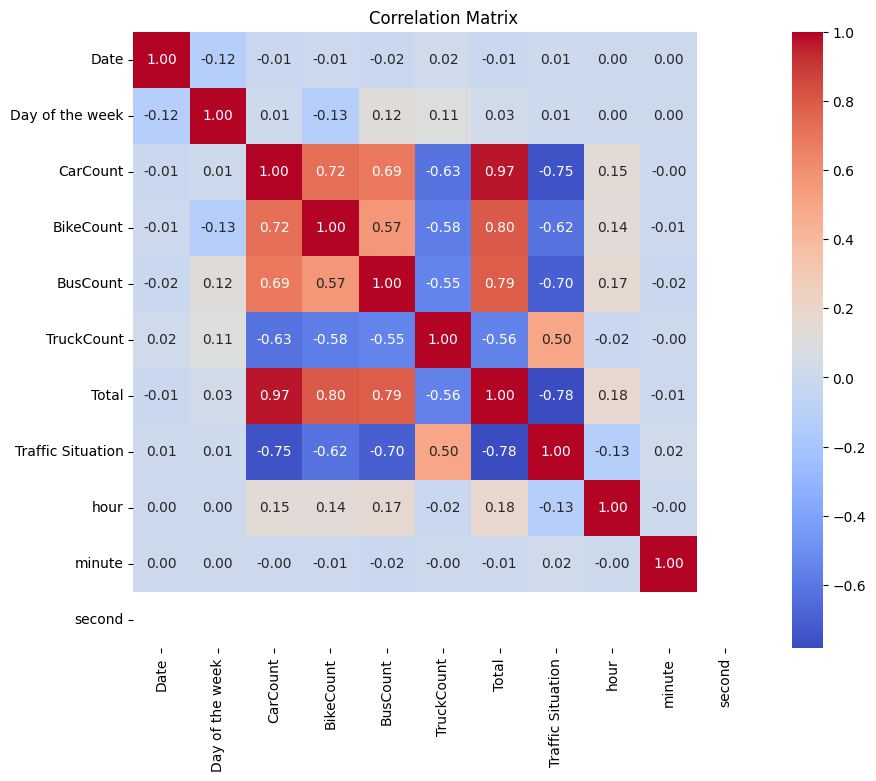

In [15]:
corr = traffic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

according to this situation , we can see a high inversion correlation between car , bike , trucks and Total cars amount and traffic situation , so we can evaluate that the needed parameters is that we are mentioned , otherise it doesn't matter

In [16]:
X=traffic_data.drop('Traffic Situation', axis=1)
X=X[['CarCount', 'BikeCount', 'TruckCount', 'BusCount', 'Total']]
y=traffic_data['Traffic Situation']

In [17]:
from collections import Counter
print('Class distribution:', Counter(y))

Class distribution: Counter({3: 1669, 0: 682, 1: 321, 2: 304})


In [18]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
from collections import Counter
print('Class distribution:', Counter(y))
print('Resampled class distribution:', Counter(y_resampled))

Class distribution: Counter({3: 1669, 0: 682, 1: 321, 2: 304})
Resampled class distribution: Counter({2: 1669, 3: 1669, 0: 1669, 1: 1669})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\vip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
model.score(X_test, y_test)

0.75

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       341
           1       0.63      0.64      0.64       310
           2       0.96      0.80      0.87       345
           3       0.74      0.87      0.80       340

    accuracy                           0.75      1336
   macro avg       0.76      0.75      0.75      1336
weighted avg       0.76      0.75      0.75      1336



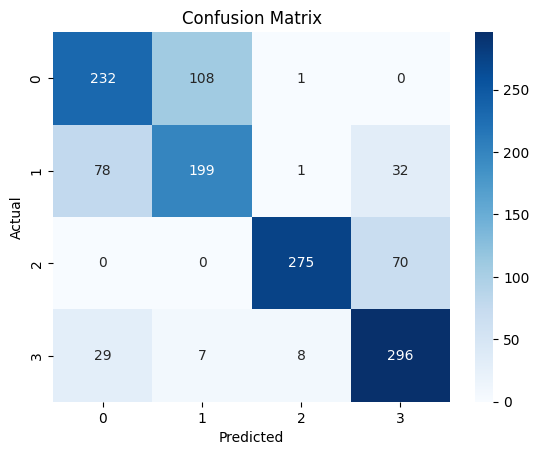

In [23]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
rf_model.score(X_test, y_test)

0.9977544910179641

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       341
           1       0.63      0.64      0.64       310
           2       0.96      0.80      0.87       345
           3       0.74      0.87      0.80       340

    accuracy                           0.75      1336
   macro avg       0.76      0.75      0.75      1336
weighted avg       0.76      0.75      0.75      1336



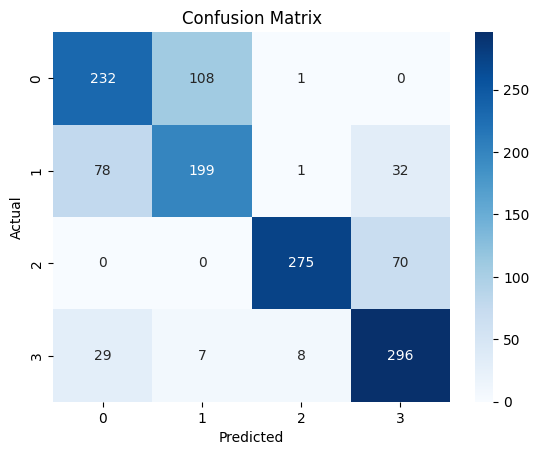

In [26]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',C=0.01)
svm_model.fit(X_train, y_train)

,C,0.01
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [28]:
svm_model.score(X_test, y_test)

0.9176646706586826

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       341
           1       0.88      0.97      0.92       310
           2       0.90      0.96      0.93       345
           3       0.91      0.75      0.82       340

    accuracy                           0.92      1336
   macro avg       0.92      0.92      0.92      1336
weighted avg       0.92      0.92      0.92      1336



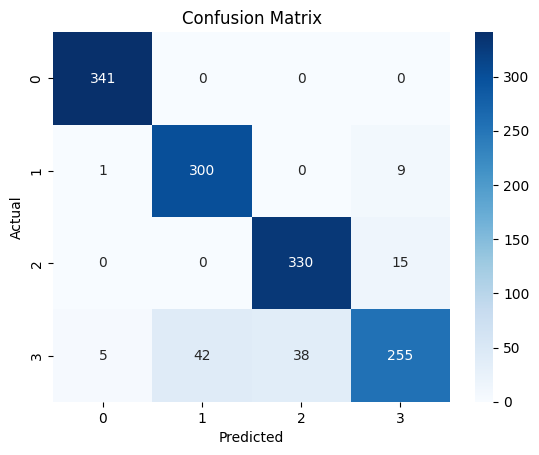

In [29]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(4, activation='softmax'))
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\vip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,564 (6.11 KB)

 Trainable params: 1,564 (6.11 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1,validation_data=(X_test, y_test))

Epoch 1/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5120 - loss: 1.5038 - val_accuracy: 0.5397 - val_loss: 0.9209
Epoch 2/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6399 - loss: 0.8989 - val_accuracy: 0.5726 - val_loss: 1.1257
Epoch 3/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6876 - loss: 0.7909 - val_accuracy: 0.6804 - val_loss: 0.7180
Epoch 4/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7120 - loss: 0.6954 - val_accuracy: 0.7418 - val_loss: 0.8022
Epoch 5/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7433 - loss: 0.6546 - val_accuracy: 0.6714 - val_loss: 0.7178
Epoch 6/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7582 - loss: 0.5965 - val_accuracy: 0.8204 - val_loss: 0.5072
Epoch 7/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7706 - loss: 0.5514 - val_accuracy: 0.7987 - val_loss: 0.5210
Epoch 8/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.5181 - val_accuracy: 0.

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       341
           1       0.91      0.96      0.94       310
           2       0.96      1.00      0.98       345
           3       1.00      0.89      0.94       340

    accuracy                           0.95      1336
   macro avg       0.96      0.95      0.95      1336
weighted avg       0.96      0.95      0.95      1336



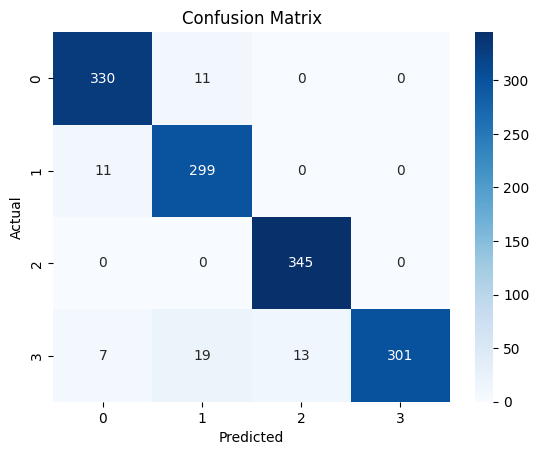

In [40]:
y_pred = nn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
conf = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# saving the nn_model
nn_model.save('traffic_nn_model.h5')